{'A': 0.005*x + 0.06,
 'I_y': poly1d([2.60416667e-07, 9.37500000e-06, 1.12500000e-04, 4.50000000e-04]),
 'I_z': poly1d([-3.04931861e-20,  4.13970550e-21,  1.66666667e-05,  2.00000000e-04]),
 'eta_y': array([1.00000000e+00, 2.50000000e-01, 2.08333333e-02, 5.78703704e-04]),
 'eta_z': array([ 1.00000000e+00,  8.33333333e-02,  2.06985275e-17, -1.52465931e-16]),
 'y_s': 0.1,
 'z_s': 0.0125*x + 0.15}
I_y(0) =  0.00045
I_y(l) =  0.0010666666666667248


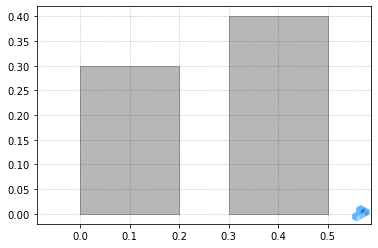

In [1]:
import sympy as sym
import matplotlib.pyplot as plt
import stanpy as stp

x = sym.Symbol("x")
l = 4  # m
b, ha, hb = 0.2, 0.3, 0.4  # m
hx = ha + (hb - ha) / l * x  # m

cs_props = stp.cs(b=b, h=hx)

print(cs_props)
print("I_y(0) = ", cs_props["I_y"](0))
print("I_y(l) = ", cs_props["I_y"](l))

offset = 0.2
fig, ax = plt.subplots()
stp.plot_cs(ax, b, hx.subs(x, 0))
stp.plot_cs(ax, b, hx.subs(x, l), dy=0.3)

ax.set_xlim(-offset, b + offset)
ax.set_ylim(-offset, float(hx.subs(x, l)) + offset)
ax.grid(linestyle=":")
ax.axis('equal')

plt.show()

{'A': 0.0003*x + 0.0116,
 'I_y': poly1d([1.56250000e-08, 1.81250000e-06, 3.87500000e-05, 2.32066667e-04]),
 'I_z': poly1d([-1.19769549e-19,  1.35528443e-20,  3.60000000e-09,  2.67098667e-05]),
 'eta_y': array([1.00000000e+00, 1.66977880e-01, 7.81025567e-03, 6.73297903e-05]),
 'eta_z': array([ 1.00000000e+00,  1.34781654e-04,  5.07409658e-16, -4.48409385e-15]),
 'y_s': (3.0e-5*x + 0.00116)/(0.0003*x + 0.0116),
 'z_s': (0.0001*x + (0.0003*x + 0.0036)*(0.0125*x + 0.17) + 0.00136)/(0.0003*x + 0.0116)}
I_y(0) =  0.0002320666666666666
I_y(l) =  0.00041706666666665803


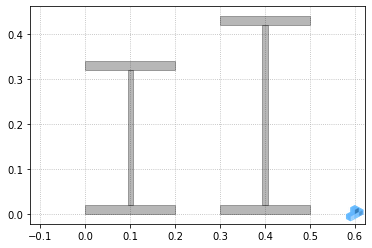

In [2]:
import numpy as np
import sympy as sym
import stanpy as stp

x = sym.Symbol("x")
l = 4  # m
s, t = 0.012, 0.02  # m
b, ha, hb = 0.2, 0.3, 0.4  # m
hx = ha + (hb - ha) / l * x  # m

b_v = np.array([b, s, b])
h_v = np.array([t, hx, t])
zsi_v = np.array([t / 2, t + hx/ 2, t + hx + t / 2])  # von OK
ysi_v = np.array([b / 2, b / 2, b / 2])  # von Links

cs_props = stp.cs(b=b_v, h=h_v, y_si=ysi_v, z_si=zsi_v)

print(cs_props)
print("I_y(0) = ", cs_props["I_y"](0))
print("I_y(l) = ", cs_props["I_y"](l))

h_v_fun = sym.lambdify(x, h_v, 'numpy')
zsi_v_fun = sym.lambdify(x, zsi_v, 'numpy')

offset = 0.2
fig, ax = plt.subplots()
stp.plot_cs(ax, b_v, h_v_fun(0), ysi_v, zsi_v_fun(0))
stp.plot_cs(ax, b_v, h_v_fun(l), ysi_v, zsi_v_fun(l), dy=0.3)

ax.set_xlim(-offset, b + offset)
ax.set_ylim(-offset, float(hx.subs(x, l)) + offset)
ax.grid(linestyle=":")
ax.axis('equal')

plt.show()

{'A': 0.0003*x + 0.01112,
 'I_y': poly1d([1.56250000e-08, 1.73750000e-06, 3.30700000e-05, 1.74642667e-04]),
 'I_z': poly1d([-1.22009140e-22, -1.35521929e-20,  3.60000000e-09,  2.67041067e-05]),
 'eta_y': array([1.00000000e+00, 1.89358080e-01, 9.94888611e-03, 8.94684002e-05]),
 'eta_z': array([ 1.00000000e+00,  1.34810726e-04, -5.07494710e-16, -4.56892799e-18]),
 'y_s': (3.0e-5*x + 0.001112)/(0.0003*x + 0.01112),
 'z_s': (0.0001*x + (0.0003*x + 0.00312)*(0.0125*x + 0.15) + 0.0012)/(0.0003*x + 0.01112)}
I_y(0) =  0.00017464266666666672
I_y(l) =  0.00033572266666666577


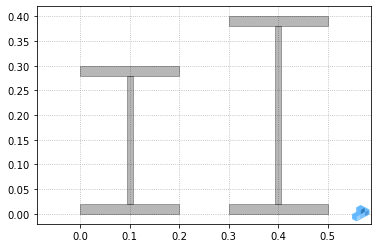

In [3]:
import numpy as np
import sympy as sym
import stanpy as stp

x = sym.Symbol("x")
l = 4  # m
s, t = 0.012, 0.02  # m
b, ha, hb = 0.2, 0.3, 0.4  # m
hx = ha + (hb - ha) / l * x  # m

b_v = np.array([b, s, b])
h_v = np.array([t, hx - 2 * t, t])
zsi_v = stp.AI_z.dot(h_v) # von OK
ysi_v = stp.AI_y.dot(b_v)  # von Links

cs_props = stp.cs(b=b_v, h=h_v, y_si=ysi_v, z_si=zsi_v)

print(cs_props)
print("I_y(0) = ", cs_props["I_y"](0))
print("I_y(l) = ", cs_props["I_y"](l))

h_v_fun = sym.lambdify(x, h_v, 'numpy')
zsi_v_fun = sym.lambdify(x, zsi_v, 'numpy')

offset = 0.2
fig, ax = plt.subplots(1)
stp.plot_cs(ax, b_v, h_v_fun(0), ysi_v, zsi_v_fun(0))
stp.plot_cs(ax, b_v, h_v_fun(l), ysi_v, zsi_v_fun(l), dy=0.3)

ax.set_xlim(-offset, b + offset)
ax.set_ylim(-offset, float(hx.subs(x, l)) + offset)
ax.grid(linestyle=":")
ax.axis('equal')

plt.show()

{'A': 0.0013*x + 0.01512,
 'I_y': poly1d([5.20833333e-08, 1.87500000e-06, 2.25036000e-05, 9.00374400e-05]),
 'I_z': poly1d([1.71875000e-07, 5.86250000e-06, 6.67033333e-05, 2.53176000e-04]),
 'eta_y': array([1.00000000e+00, 2.49936027e-01, 2.08246703e-02, 5.78463063e-04]),
 'eta_z': array([1.00000000e+00, 2.63466258e-01, 2.31558284e-02, 6.78875565e-04]),
 'y_s': (5.0e-6*x + (0.0003*x + 0.00312)*(0.0125*x + 0.15) + (0.0005*x + 0.006)*(0.025*x + 0.29) + 6.0e-5)/(0.0013*x + 0.01512),
 'z_s': ((0.0003*x + 0.00312)*(0.0125*x + 0.15) + 2*(0.0005*x + 0.006)*(0.0125*x + 0.15))/(0.0013*x + 0.01512)}


I_y(0) =  9.003744000000004e-05
I_y(l) =  0.00021338517333335038


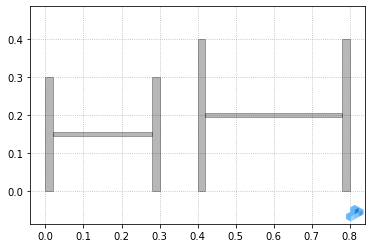

In [4]:
import numpy as np
import sympy as sym
import stanpy as stp

x = sym.Symbol("x")
l = 4  # m
s, t = 0.012, 0.02  # m
ba, bb, ha, hb = 0.3, 0.4, 0.3, 0.4  # m
hx = ha + (hb - ha) / l * x  # m
bx = ba + (bb - ba) / l * x  # m

b_v = np.array([t, hx - 2 * t, t])
h_v = np.array([bx, s, bx])
zsi_v = stp.AH_z.dot(h_v)  # von OK
ysi_v = stp.AH_y.dot(b_v)  # von Links

cs_props = stp.cs(b=b_v, h=h_v, y_si=ysi_v, z_si=zsi_v)

print(cs_props)
print("I_y(0) = ", cs_props["I_y"](0))
print("I_y(l) = ", cs_props["I_y"](l))

b_v_fun = sym.lambdify(x, b_v, 'numpy')
h_v_fun = sym.lambdify(x, h_v, 'numpy')
zsi_v_fun = sym.lambdify(x, zsi_v, 'numpy')
ysi_v_fun = sym.lambdify(x, ysi_v, 'numpy')

offset = 0.2
fig, ax = plt.subplots(1)
stp.plot_cs(ax, b_v_fun(0), h_v_fun(0), ysi_v_fun(0), zsi_v_fun(0))
stp.plot_cs(ax, b_v_fun(l), h_v_fun(l), ysi_v_fun(l), zsi_v_fun(l), dy=0.4)

ax.grid(linestyle=":")
ax.axis('equal')

plt.show()

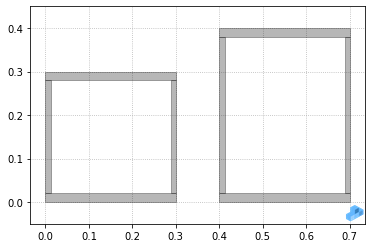

In [5]:
import numpy as np
import sympy as sym
import stanpy as stp

x = sym.Symbol("x")
l = 4  # m
s, t = 0.012, 0.02  # m
b, ha, hb = 0.3, 0.3, 0.4  # m
hx = ha + (hb - ha) / l * x  # m

b_v = np.array([b, s, s, b])
h_v = np.array([t, hx - 2 * t, hx - 2 * t, t])
zsi_v = stp.AK_z.dot(h_v)  # von OK
ysi_v = stp.AK_y.dot(b_v)  # von Links

cs_props = stp.cs(b=b_v, h=h_v, y_si=ysi_v, z_si=zsi_v)

h_v_fun = sym.lambdify(x, h_v, 'numpy')
zsi_v_fun = sym.lambdify(x, zsi_v, 'numpy')

offset = 0.2
fig, ax = plt.subplots()
stp.plot_cs(ax, b_v, h_v_fun(0), ysi_v, zsi_v_fun(0))
stp.plot_cs(ax, b_v, h_v_fun(l), ysi_v, zsi_v_fun(l), dy=0.4)

ax.set_xlim(-offset, b + offset)
ax.set_ylim(-offset, float(hx.subs(x, l)) + offset)
ax.grid(linestyle=":")
ax.axis('equal')

plt.show()

{'A': 0.0003*x + 0.01752,
 'I_y': poly1d([1.56250e-08, 2.73750e-06, 5.33700e-05, 2.80136e-04]),
 'I_z': poly1d([6.86038785e-20, 5.42103834e-20, 3.60000000e-09, 1.39832640e-04]),
 'eta_y': array([1.00000000e+00, 1.90514607e-01, 9.77203930e-03, 5.57764800e-05]),
 'eta_z': array([1.00000000e+00, 2.57450621e-05, 3.87680468e-16, 4.90614198e-16]),
 'y_s': (4.5e-5*x + 0.002628)/(0.0003*x + 0.01752),
 'z_s': (0.00018*x + (0.0003*x + 0.00312)*(0.0125*x + 0.15) + 0.00216)/(0.0003*x + 0.01752)}


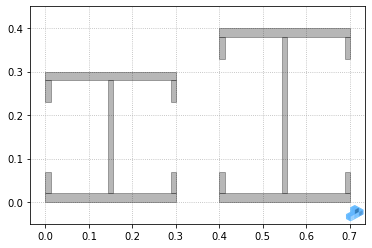

In [6]:
import numpy as np
import sympy as sym
import stanpy as stp

x = sym.Symbol("x")
l = 4  # m
s, t = 0.012, 0.02  # m
b, ha, hb = 0.3, 0.3, 0.4  # m
hx = ha + (hb - ha) / l * x  # m

b_v = np.array([b, s, s, b])
h_v = np.array([t, hx - 2 * t, hx - 2 * t, t])
h_i = 0.05

b_v = np.array([b, s, b, s, s, s, s])
h_v = np.array([t, hx - 2 * t, t, h_i, h_i, h_i, h_i])
zsi_v = stp.AI_zp.dot(h_v)  # von OK
ysi_v = stp.AI_yp.dot(b_v)  # von Links

cs_props = stp.cs(b=b_v, h=h_v, y_si=ysi_v, z_si=zsi_v)

print(cs_props)

h_v_fun = sym.lambdify(x, h_v, 'numpy')
zsi_v_fun = sym.lambdify(x, zsi_v, 'numpy')

offset = 0.2
fig, ax = plt.subplots()
stp.plot_cs(ax, b_v, h_v_fun(0), ysi_v, zsi_v_fun(0))
stp.plot_cs(ax, b_v, h_v_fun(l), ysi_v, zsi_v_fun(l), dy=0.4)

ax.set_xlim(-offset, b + offset)
ax.set_ylim(-offset, float(hx.subs(x, l)) + offset)
ax.grid(linestyle=":")
ax.axis('equal')

plt.show()